# Circuit Translations
Apart from qiskit, QLauncher is also compatible with cirq. Moreover you can use QLauncher's translations to transform circuits between frameworks with ease.

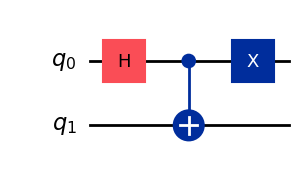

In [1]:
import qiskit

circuit = qiskit.QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.x(0)
circuit.draw("mpl")

Now to obtain the cirq version you can just use QLauncher's Translation class and specify 'cirq' as language:

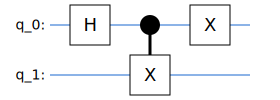

In [2]:
from qlauncher.base.translator import Translation
from cirq.contrib.svg import SVGCircuit

cirq_circuit = Translation.get_translation(circuit, 'cirq')
SVGCircuit(cirq_circuit)

When you translate a circuit it is first transpiled to use basis gates available in the destination language, next it gets translated to qasm which is then translated to the requested language.

## Your own translation

You can also add your own translation to some other circuit framework to make it possible for QLauncher to convert to and from it. To do this implement a class which inherits from the Translation base class. In the class you should specify the set of basis gates used by the framework, as well as its name and class of it's circuit object. Below you can see how the translation is implemented for Cirq.

In [3]:
import cirq
from cirq.contrib.qasm_import.qasm import circuit_from_qasm


class CirqTranslation(Translation):
    """ Translation class for Cirq """
    basis_gates = ['x', 'y', 'z', 'cx', 'h', 'rx', 'ry', 'rz']
    language: str = 'cirq'
    circuit_object = cirq.Circuit

    def to_qasm(self, circuit: cirq.Circuit) -> str:
        return circuit.to_qasm()

    def from_qasm(self, qasm: str) -> cirq.Circuit:
        return circuit_from_qasm(qasm)

Since the translation is carried out with qasm as an intermediate form, every translation needs to implement methods to_qasm and from_qasm. Method from_qasm takes a qasm representation in the form of a string and returns a circuit object of a given framework while to_qasm converts such object into a qasm string. How to perform such conversion will dependent on the framework, for cirq there exist built-in methods that do exactly what we need.

## Cirq Backend

QLauncher also comes with a cirq backend and thanks to translations you can use it interchangeably with qiskit backends:

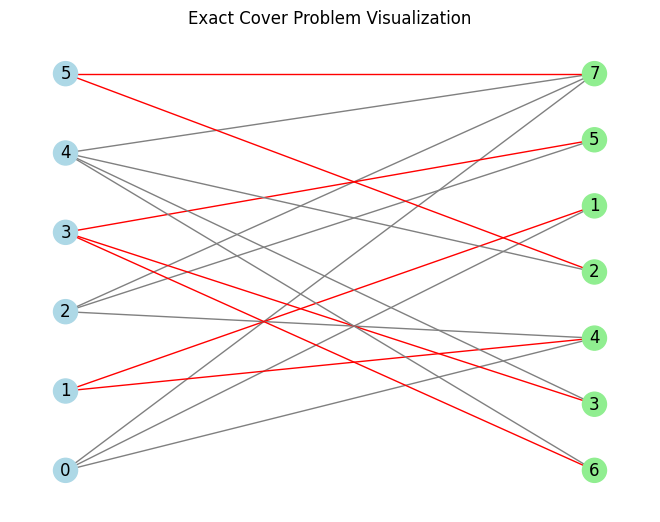

In [4]:
from qlauncher.problems import EC
from qlauncher.routines.qiskit import QAOA
from qlauncher.routines.cirq_routines import CirqBackend
from qlauncher.launcher import QLauncher

problem = EC.from_preset('default')
algorithm = QAOA()
backend = CirqBackend()
launcher = QLauncher(problem, algorithm, backend)
results = launcher.run()
problem.visualize(results.best_bitstring[::-1])